In [5]:
import numpy as np
import serial
import struct
import time
import subprocess
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import AltAz, EarthLocation, get_body, SkyCoord
from astropy import units as u
from astropy.time import Time
from datetime import datetime
from scipy.optimize import fsolve
import virgo
%matplotlib inline


## Testing the signal before and after xlating
trying to eliminate the center peak caused by hackrf \
Conclusion: both of the datas' peaks are side leaned, might be able to get rid off\
Therefore, a program that change the astrovirgo is necessary (maybe use our own spectrometer somehow) 

In [11]:
complex_signal = np.fromfile(open("data/test_data/test.dat"), dtype=np.complex64)
complex_signal

array([ 0.75      +0.9921875j ,  0.5818629 +1.5471652j ,
       -0.11600408+1.9155186j , ...,  1.1522539 -0.54845774j,
        1.3766129 -0.07086091j,  0.8371677 +0.3567285j ], dtype=complex64)

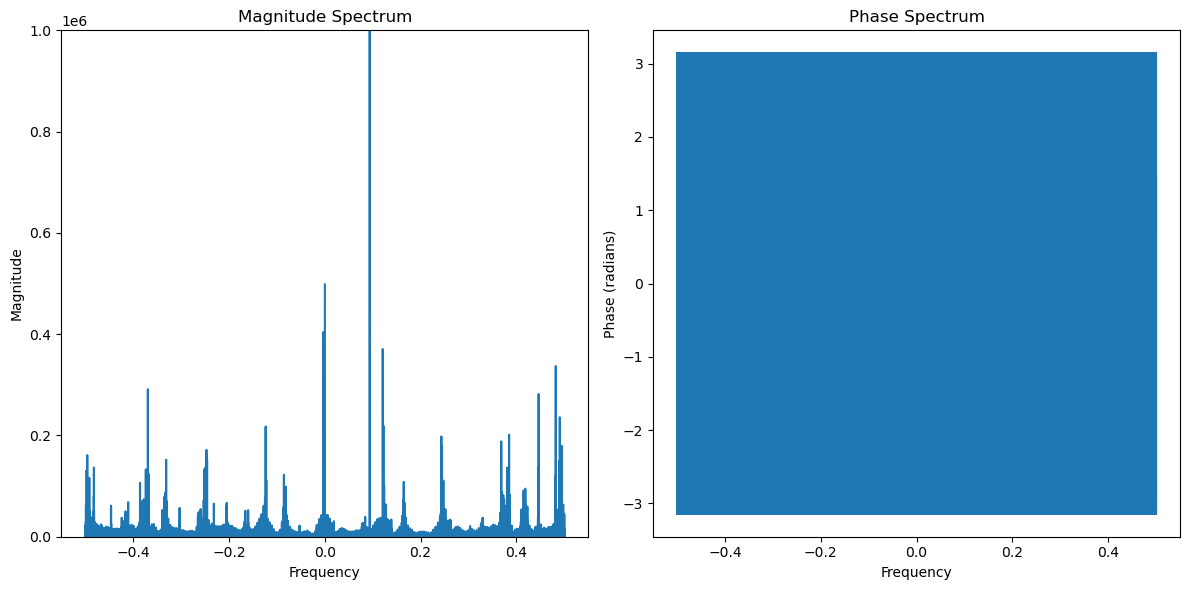

In [22]:

# Perform FFT on the complex signal
fft_result = np.fft.fft(complex_signal)

# Get the corresponding frequencies
frequencies = np.fft.fftfreq(len(complex_signal))

# Plot the magnitude and phase of the FFT
plt.figure(figsize=(12, 6))

# Plot magnitude spectrum
plt.subplot(1, 2, 1)
plt.plot(frequencies, np.abs(fft_result))
plt.title('Magnitude Spectrum')
plt.ylim(-0.1,0.1e7)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

# Plot phase spectrum
plt.subplot(1, 2, 2)
plt.plot(frequencies, np.angle(fft_result))
plt.title('Phase Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()


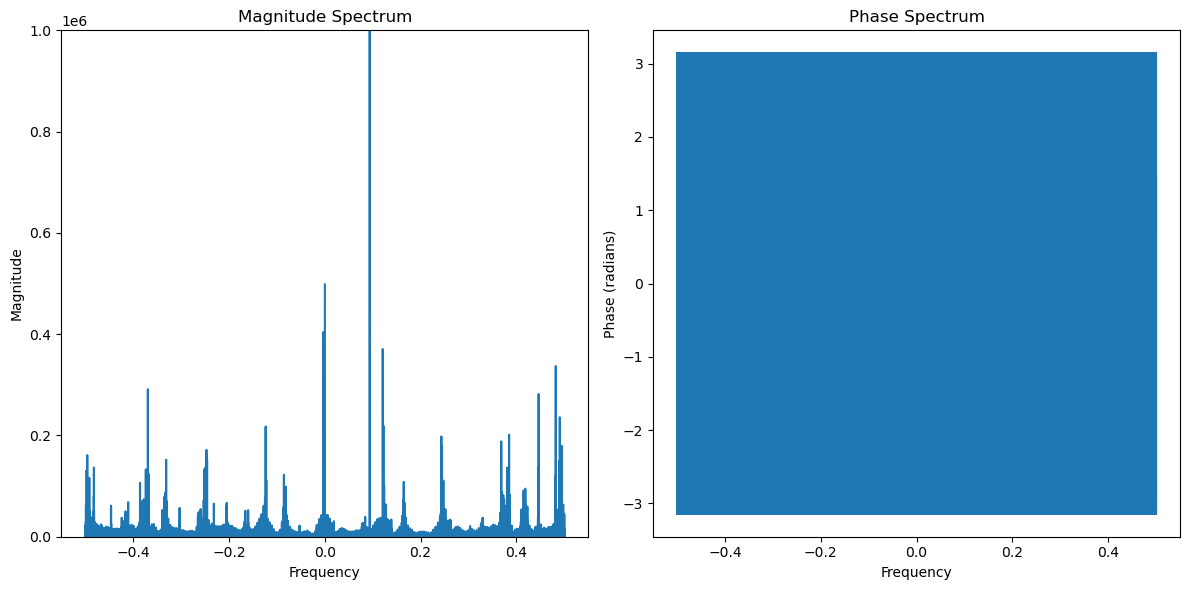

In [23]:
xlated_signal = np.fromfile(open("/Users/franklv/Desktop/probservatory-api/data/test_data/xlat_test.dat"), dtype=np.complex64)

# Perform FFT on the complex signal
fftx_result = np.fft.fft(xlated_signal)

# Get the corresponding frequencies
frequenciesx = np.fft.fftfreq(len(xlated_signal))

# Plot the magnitude and phase of the FFT
plt.figure(figsize=(12, 6))

# Plot magnitude spectrum
plt.subplot(1, 2, 1)
plt.plot(frequenciesx, np.abs(fftx_result))
plt.title('Magnitude Spectrum')
plt.ylim(-0.1,0.1e7)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

# Plot phase spectrum
plt.subplot(1, 2, 2)
plt.plot(frequenciesx, np.angle(fftx_result))
plt.title('Phase Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()


### Now test the signal that received with orientation; plot to 2D graphs